### Clustering approaches

This notebooks demonstrates a few unsupervised learning approaches using the diabetes dataset in sklearn.

Although the diabetes dataset is a regresion problem, we will use it to explore a few unpservised learning algorithms:
- K-means clustering
- Hierarchical clustering

Clustering is the task of partitioning the data into groups, called _clusters_. The GOAL is to split the data in such a way that points within a cluster(group) are very similar. 

#### Data import 

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The native to sklearn datasets are raw and dictionary-like. 

In [2]:
raw_data = load_diabetes()
raw_data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

Transform them to a normal pandas DataFrame.

In [3]:
data = pd.DataFrame( np.c_[raw_data['data'], raw_data['target']],
                     columns= raw_data['feature_names'] + ['target'])

In [4]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [5]:
data.shape

(442, 11)

In [6]:
# Suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.4f' % x)
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000
mean,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,152.1335
std,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,77.0930
min,-0.1072,-0.0446,-0.0903,-0.1124,-0.1268,-0.1156,-0.1023,-0.0764,-0.1261,-0.1378,25.0000
25%,-0.0373,-0.0446,-0.0342,-0.0367,-0.0342,-0.0304,-0.0351,-0.0395,-0.0332,-0.0332,87.0000
50%,0.0054,-0.0446,-0.0073,-0.0057,-0.0043,-0.0038,-0.0066,-0.0026,-0.0019,-0.0011,140.5000
75%,0.0381,0.0507,0.0312,0.0356,0.0284,0.0298,0.0293,0.0343,0.0324,0.0279,211.5000
max,0.1107,0.0507,0.1706,0.1320,0.1539,0.1988,0.1812,0.1852,0.1336,0.1356,346.0000


We see that the features have been scaled/normalized (could be very important with K-means, PCA and other techniques).

## K-means clustering 

**K-means** is one of the simplest and commonly used clustering algorithms. It tried to find _cluster centers_ that are representative of certain regions of the data. In a nutshell, the algorithm works in the following way: 

- You specify the number of clusters within the data, and the algorithm selects data points at random as the respective clusters (if we select 3 clusters, 3 random points will be the initial cluster centers).
- Then, teratively: each data point is assigned to the cluster center closest to it (distance is measured by Euclidean, Manhattan, etc.).
- Then cluster centers are updated (recomputed) to be the mean of the assigned points. 
- After the update, some points might change the cluster to which they are assigned. 
- The process is repeated until the cluster centers no longer change.

#### Using artificial data

Let's firt demonstrate K-means with artificially created data, using the make_blobs package, which create 2-dimensional dataset.

We can tell the *make_blobs* function how many centers to create, how many samples, etc.

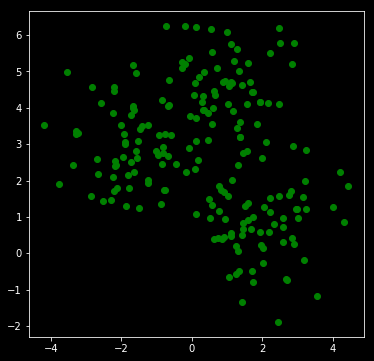

In [40]:
from sklearn.datasets.samples_generator import make_blobs

X_blob, y = make_blobs(n_samples=200, centers=3,random_state=0)

plt.figure(figsize=(6, 6))
plt.scatter(X_blob[:, 0], X_blob[:, 1], color='green')

Q: Can you distinguish the different centers? 

Let's apply K-means to it.

In [8]:
from sklearn.cluster import KMeans

kmeans_blob = KMeans(n_clusters=3)
kmeans_blob.fit(X_blob)
y_kmeans = kmeans_blob.predict(X_blob)

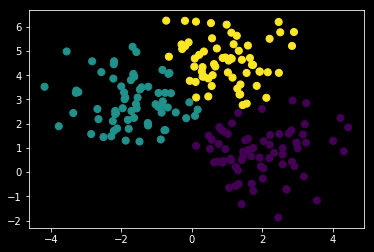

In [41]:
# Let's plot the degenrated dataset again, coloring by the predicted clusters.
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_kmeans, s=50)

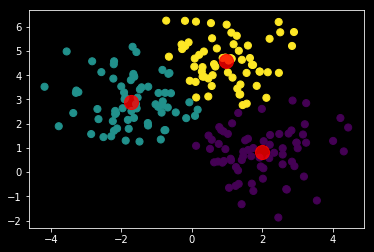

In [42]:
# We can also add the cluster centers to the plot
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_kmeans, s=50)

centers = kmeans_blob.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.8)

The K-means algorithm seems to work very well in this artificial case. It assign the points to the way we visually might assign them.

- However, in reality, we do NOT know how many clusters might be appropriate.
- It's difficult to perform clustering with high-dimenional data. 

In [11]:
from sklearn.cluster import KMeans

Provide number of clusters _n_clusters_ and fit it to the data. Default value of number of clusters is 8. 

In [12]:
y = data.target
X = data.drop('target', axis=1)

# Fit a simple KMeans algorithm 
kmeans = KMeans(n_clusters=3, random_state=1).fit(X)

#To inspect the centroid values generated by the algorithm 
centroids = kmeans.cluster_centers_
print(centroids)

[[ 0.01795047  0.01224393  0.02565035  0.02163172  0.05159386  0.04946163
  -0.02457699  0.05104828  0.04328773  0.03229299]
 [-0.02703904 -0.02687982 -0.03283662 -0.03305676 -0.02363548 -0.02718266
   0.03512552 -0.03919772 -0.03752525 -0.03166754]
 [ 0.01355049  0.01789429  0.01341434  0.01681404 -0.01651163 -0.01119002
  -0.01660931 -0.000122    0.00429227  0.00696907]]


In [13]:
print('Size of the centroids: ', centroids.shape)
print('Size of the data set: ', X.shape)

Size of the centroids:  (3, 10)
Size of the data set:  (442, 10)


The first array contains values for the centroids of the first centroid, the second array- of the second and so on. If we had more clsuters, we'd have large first dimension of the centroids array. Basically, in pseudo-code: centroids.shape[0] == n_clusters.

Each training point is assigned a label, which you can inspect. 

In [14]:
print('Cluster membership: \n{}'.format(kmeans.labels_))

Cluster membership: 
[2 1 2 2 1 1 1 0 2 2 1 2 1 2 1 0 2 0 1 1 1 1 1 0 1 2 1 1 1 2 1 1 2 1 1 1 2
 1 0 2 0 1 2 1 2 2 1 1 2 2 2 2 1 2 1 1 2 1 1 0 1 2 1 1 2 0 2 2 2 1 1 0 0 0
 2 2 2 1 1 1 0 2 1 1 1 2 1 1 1 1 1 0 2 1 1 1 2 0 2 2 0 2 1 0 1 2 1 2 2 0 1
 1 1 0 0 0 0 0 0 1 1 0 0 0 1 2 1 1 1 0 2 1 2 1 1 2 1 2 2 2 2 0 0 1 0 2 0 0
 2 2 2 1 0 2 2 0 1 0 1 2 1 0 1 2 1 1 1 0 0 0 1 1 0 1 2 1 2 0 1 0 2 1 0 2 2
 2 0 1 0 1 2 2 2 0 1 0 1 2 1 2 1 1 0 0 2 2 0 2 0 2 1 2 2 1 1 2 0 0 1 1 1 1
 2 1 1 2 1 2 1 1 0 2 0 1 2 2 0 1 2 0 2 2 1 2 1 1 1 1 0 0 2 0 0 0 0 1 2 1 0
 2 1 1 0 1 2 2 1 0 0 1 2 2 1 0 2 2 0 1 2 2 2 1 0 1 2 0 1 0 2 0 0 0 1 2 2 2
 1 1 1 2 2 2 0 0 0 2 2 0 1 0 2 0 1 0 2 1 2 0 2 2 0 0 0 0 0 0 2 2 2 2 0 2 0
 2 1 1 0 2 1 0 2 2 2 2 0 0 0 2 1 2 0 1 1 0 0 2 1 2 1 0 2 1 2 2 2 2 0 0 0 2
 1 0 2 1 1 2 0 0 2 1 2 1 2 2 0 2 1 1 2 1 0 1 2 1 0 1 1 2 2 2 2 1 0 2 2 2 1
 2 0 0 0 1 0 1 0 0 2 1 0 1 2 0 0 0 2 1 0 2 0 1 1 2 0 1 1 1 1 2 0 2 2 1]


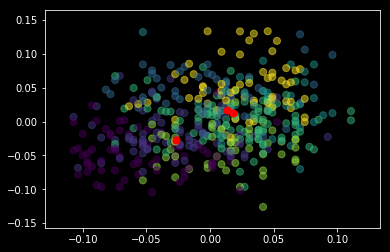

In [43]:
plt.scatter(data['age'], data['s5'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

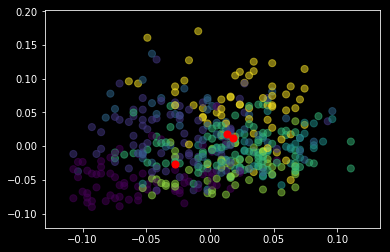

In [44]:
plt.scatter(data['age'], data['bmi'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

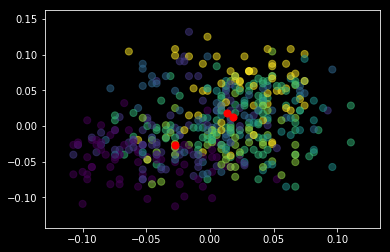

In [45]:
plt.scatter(data['age'], data['bp'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

#### Find out optimal number of clusters 

For that we can keep track of the interia value of the k-means clusters. The lower the intertia, the better. However, interia will always be lower with higher number of clusters. We want to keep the intertia down while also keeping the number of clusters realtively low, i.e. we look for the 'elbow' in the plot of number of clusters (x-axis) and the intertia value(y-axis) below. 

In [18]:
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

Text(0,0.5,'Inertia value')

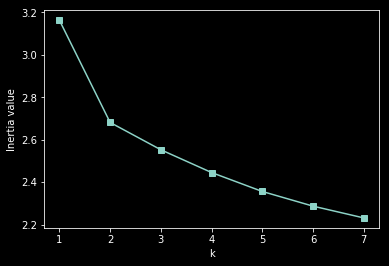

In [22]:
plt.style.use('dark_background')
plt.plot(range(1, 8), inertia, marker='s')
plt.xlabel('k')
plt.ylabel('Inertia value')

### Hierarchical clustering 

It's a bottom-down approach: each sample is in a cluster of its own. We iteratively start merging the clusters closest to each other. In the end, all the samples are in a single cluster.

In [23]:
from scipy.cluster.hierarchy import linkage, dendrogram

To perform the clustering, we call the linkage function. Check the options for the methods. 

In [28]:
# To make the visualization readable and for the purposes of this example only, let's work with 50 samples from the data
merge_complete = linkage(X.loc[:50,:], method='complete')

The height in a dendrogram specifies max distance. Distance is measured using a linkage method. For instance, method == 'complete' means distance between clusters is the max distance between the samples in the clusters. 

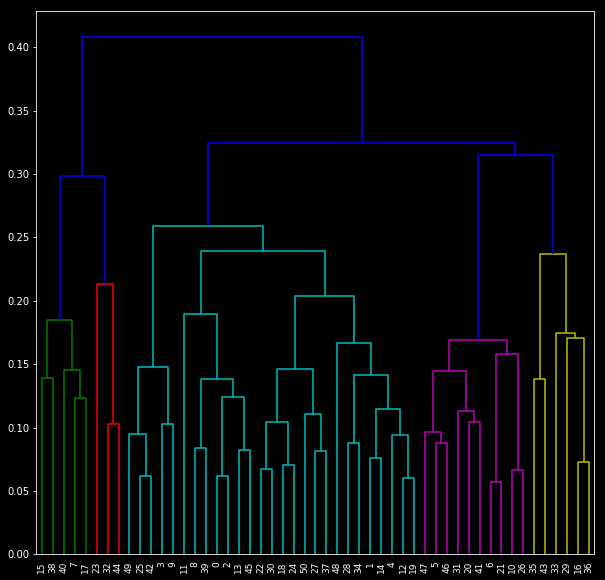

In [29]:
plt.figure(figsize=(10, 10))
dendrogram(merge_complete, leaf_font_size=9, leaf_rotation=90)
plt.show()

In our case, we did not have an index, but if we did, we could use the index for names in the samples in a dendrogram.

Let's explore other linkage methods and dissimilarity metrics. 

Linkage == single uses the minimal intercluster dissimilarity (so like opposite of complete). Single linkage can result in extended, trailing clusters in which observations are fused one-at-a-time. 

*Note* I have also specified the **metric** here to be 'cosine', default is 'euclidean'. This is another parameter you may want to adjust. 

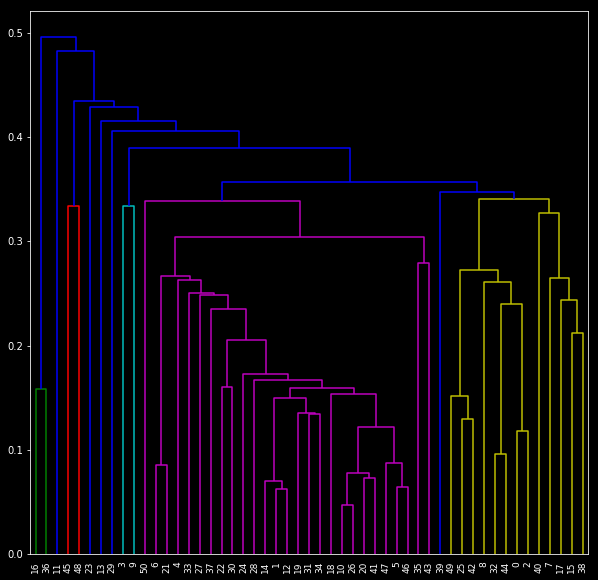

In [36]:
# To make the visualization readable and for the purposes of this example only, let's work with 50 samples from the data
merge_single = linkage(X.loc[:50,:], method='single', metric='cosine')
plt.figure(figsize=(10, 10))
dendrogram(merge_single, leaf_font_size=9, leaf_rotation=90)
plt.show()

Linkage == average takes the mean of the intercluster dissimilarity. 

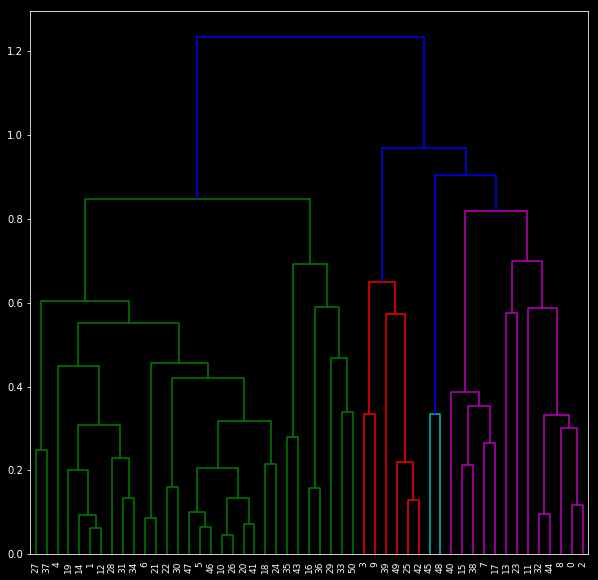

In [37]:
# To make the visualization readable and for the purposes of this example only, let's work with 50 samples from the data
merge_single = linkage(X.loc[:50,:], method='average')
plt.figure(figsize=(10, 10))
dendrogram(merge_single, leaf_font_size=9, leaf_rotation=90)
plt.show()

The linkage below is 'ward', which is based on the sum of squares (more precisely, Ward variance minimization algorithm.)

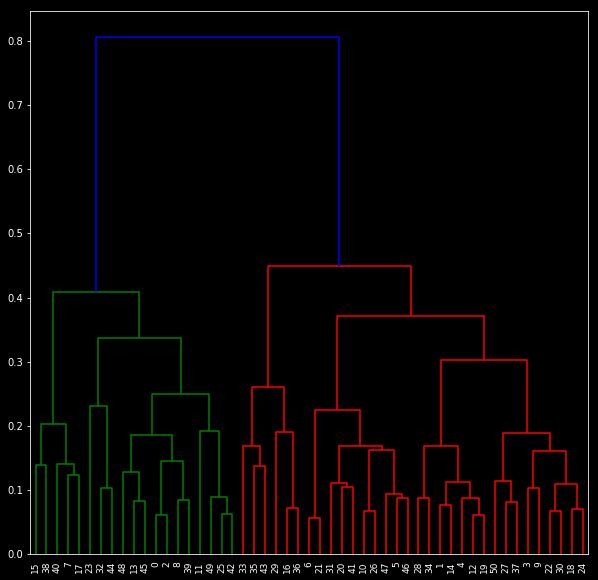

In [39]:
# To make the visualization readable and for the purposes of this example only, let's work with 50 samples from the data
merge_single = linkage(X.loc[:50,:], method='ward')
plt.figure(figsize=(10, 10))
dendrogram(merge_single, leaf_font_size=9, leaf_rotation=90)
plt.show()

Other possible parameters for the linkage are 'median'(based on median of objects in clusters), 'centroid'(based on the geometric mean).

For a full list of the **metric** parameter, you can have a look here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist